# Music popularity prediction
* Dataset source: https://www.kaggle.com/datasets/paradisejoy/top-hits-spotify-from-20002019

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [93]:
df = pd.read_csv('music.csv')
df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


## Problem statement
* Predict the popularity of a song based on its features (danceability, energy, etc.)
* The popularity is a value between 0 and 100, with 100 being the most popular
* The dataset contains 2000 rows and 18 columns


### EDA (Exploratory Data Analysis)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


In [95]:
df.describe()

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,228748.124500,2009.49400,59.872500,0.667437,0.720366,5.378000,-5.512435,0.553500,0.103568,0.128955,0.015226,0.181216,0.551690,120.122558
std,39136.569008,5.85996,21.335577,0.140416,0.152745,3.615059,1.933482,0.497254,0.096159,0.173346,0.087771,0.140669,0.220864,26.967112
min,113000.000000,1998.00000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.000000,0.023200,0.000019,0.000000,0.021500,0.038100,60.019000
25%,203580.000000,2004.00000,56.000000,0.581000,0.622000,2.000000,-6.490250,0.000000,0.039600,0.014000,0.000000,0.088100,0.386750,98.985750
50%,223279.500000,2010.00000,65.500000,0.676000,0.736000,6.000000,-5.285000,1.000000,0.059850,0.055700,0.000000,0.124000,0.557500,120.021500
75%,248133.000000,2015.00000,73.000000,0.764000,0.839000,8.000000,-4.167750,1.000000,0.129000,0.176250,0.000068,0.241000,0.730000,134.265500
max,484146.000000,2020.00000,89.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.976000,0.985000,0.853000,0.973000,210.851000


In [96]:
df.isnull().sum()

artist              0
song                0
duration_ms         0
explicit            0
year                0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64

In [97]:
df['artist'].unique().size

835

* There're 835 unique artists in the dataset


In [98]:
# identify the artist with the most songs
top_artists = df['artist'].value_counts().head(10)
print(top_artists)

Rihanna           25
Drake             23
Eminem            21
Calvin Harris     20
Britney Spears    19
David Guetta      18
Chris Brown       17
Kanye West        17
Beyoncé           16
Taylor Swift      16
Name: artist, dtype: int64


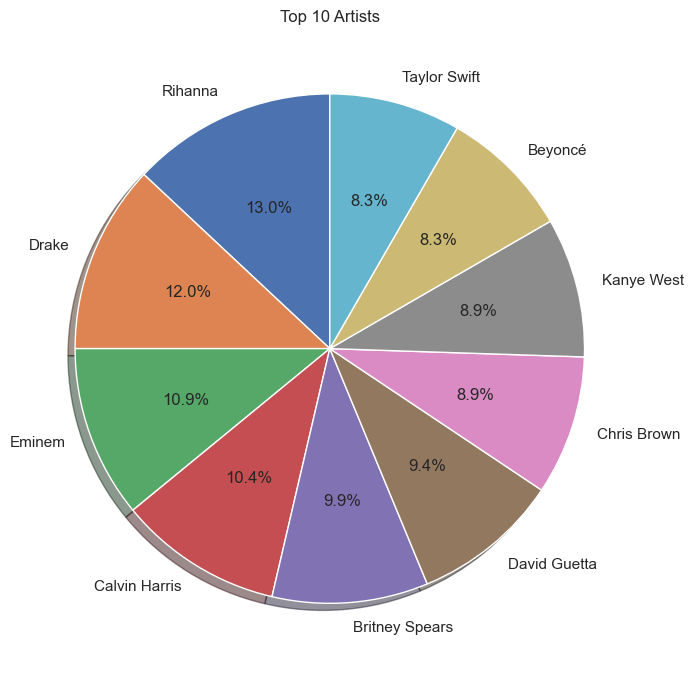

In [99]:
plt.pie(top_artists, labels=top_artists.index, autopct='%1.1f%%', shadow=True, startangle=90)

plt.title('Top 10 Artists')
plt.show()

### Top 10 artists by number of songs
* Rihanna =           25
* Drake    =         23
* Eminem    =        21
* Calvin Harris =     20
* Britney Spears =   19
* David Guetta   =   18
* Chris Brown  =     17
* Kanye West  =      17
* Beyoncé   =        16
* Taylor Swift  =     16

In [100]:
# identify the genre with the most songs
top_genres = df['genre'].value_counts().head(10)
print(top_genres)

pop                               428
hip hop, pop                      277
hip hop, pop, R&B                 244
pop, Dance/Electronic             221
pop, R&B                          178
hip hop                           124
hip hop, pop, Dance/Electronic     78
rock                               58
rock, pop                          43
Dance/Electronic                   41
Name: genre, dtype: int64


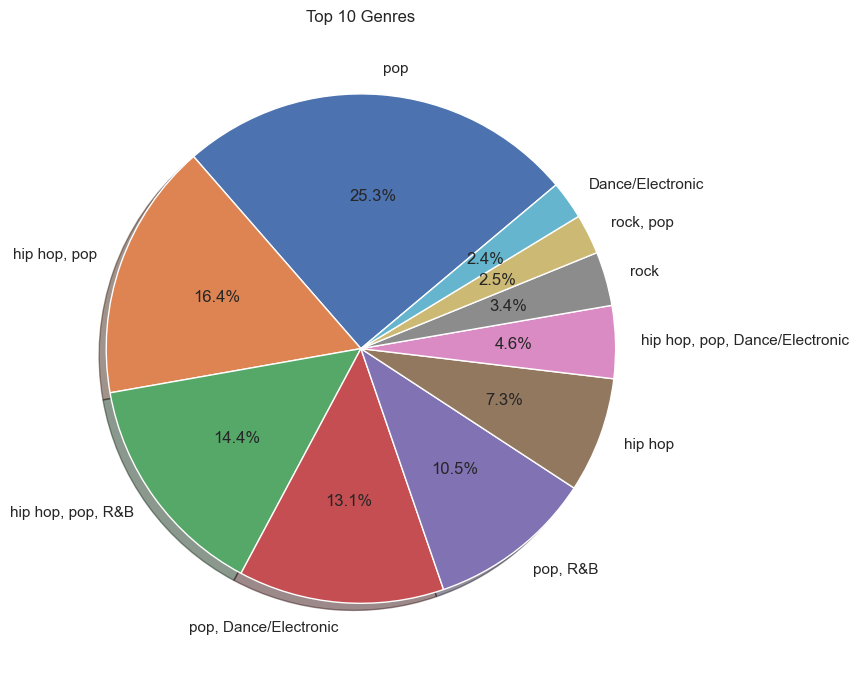

In [101]:
plt.pie(top_genres, labels=top_genres.index, autopct='%1.1f%%', shadow=True, startangle=40)
plt.title('Top 10 Genres')
plt.show()

In [102]:
categorical_columns = df.select_dtypes(include=['object']).columns
print(categorical_columns)

print("Unique genres {}".format(df['genre'].unique().size))
print("Unique artists {}".format(df['artist'].unique().size))
print("Unique songs {}".format(df['song'].unique().size))

Index(['artist', 'song', 'genre'], dtype='object')
Unique genres 59
Unique artists 835
Unique songs 1879


In [103]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['genre'] = le.fit_transform(df['genre'])
df['artist'] = le.fit_transform(df['artist'])
df['explicit'] = le.fit_transform(df['explicit'])


We can drop songs column as it's not useful for our model

In [119]:
fig = px.imshow(df.corr(), text_auto=True, height=1000, width=1000)
fig.update_layout(title='Correlation Matrix')
fig.show()


In [ ]:
plt.scatter(df['genre'], df['popularity'])